In [127]:
from datetime import datetime
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

In [128]:
def normalize_col(column):
    return (column - column.min()) / (column.max()-column.min())

In [129]:
test_tickers = ["RYAAY","RYA.IR","RY4C.DE"]

In [130]:
start = datetime(2023,1,11)
end = datetime(2023,1,18)
data = [yf.Ticker(ticker).history(interval='1m', start=start, end=end)["Close"] for ticker in test_tickers]

In [131]:
df = pd.concat(data, axis=1, ignore_index=False)
df.columns = test_tickers
for col in df.columns:
    df[col] = normalize_col(df[col])

In [132]:
display(df)

,RYAAY,RYA.IR,RY4C.DE
Datetime,,,
2023-01-11 08:00:00+00:00,NaN,0.439025,NaN
2023-01-11 08:01:00+00:00,NaN,0.420732,NaN
2023-01-11 08:02:00+00:00,NaN,0.371951,NaN
2023-01-11 08:03:00+00:00,NaN,0.371951,NaN
2023-01-11 08:04:00+00:00,NaN,0.353658,0.300614
...,...,...,...
2023-01-17 20:56:00+00:00,0.929079,NaN,NaN
2023-01-17 20:57:00+00:00,0.946415,NaN,NaN
2023-01-17 20:58:00+00:00,0.946415,NaN,NaN


<AxesSubplot:xlabel='Datetime'>

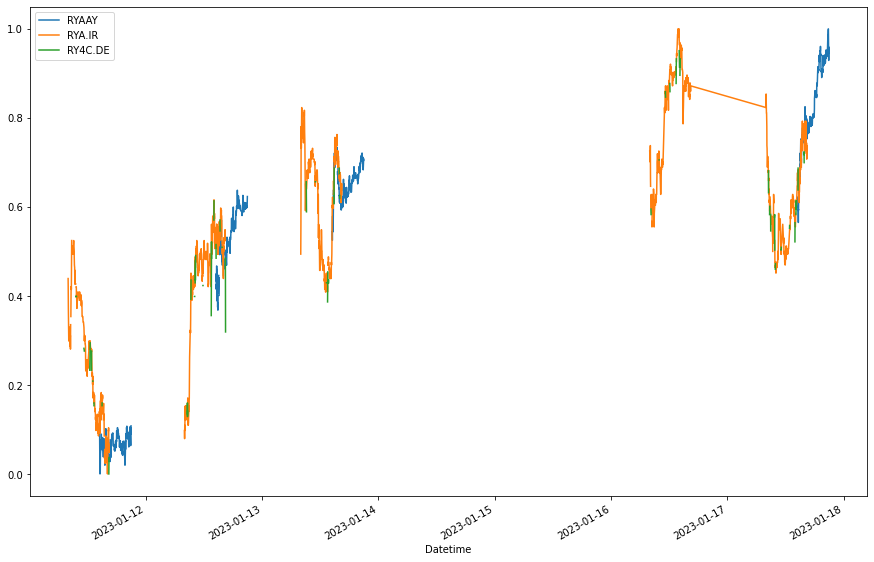

In [133]:
df.plot(figsize=(15,10))

In [151]:
def df_basing(df:pd.DataFrame)->(pd.DataFrame,pd.DataFrame):
    base_df = df[test_tickers[0]].fillna(method='ffill')
    diff_df = df[test_tickers[1:]]
    for col in diff_df.columns:
        diff_df[col] = diff_df[col]/base_df
    diff_df=diff_df.apply(lambda x: x-1)
    return base_df, diff_df

In [154]:
def base_plot(tickers:list, diff_df):
    fig, ax = plt.subplots(1,1,figsize = (20,10))
    ax.axhline(0 ,color="r", label = tickers[0])
    ax.plot(diff_df,label=diff_df.columns)
    ax.set_title("Difference of European Traded Stocks Versus NYSE Traded Stock")
    ax.set_xlabel("Date")
    ax.set_ylabel(f"Percentage difference to {test_tickers[0]}")
    ax.legend()

In [152]:
base_df, diff_df = df_basing(df)

C:\Users\olive\AppData\Local\Temp\ipykernel_15308\3679318692.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diff_df[col] = diff_df[col]/base_df


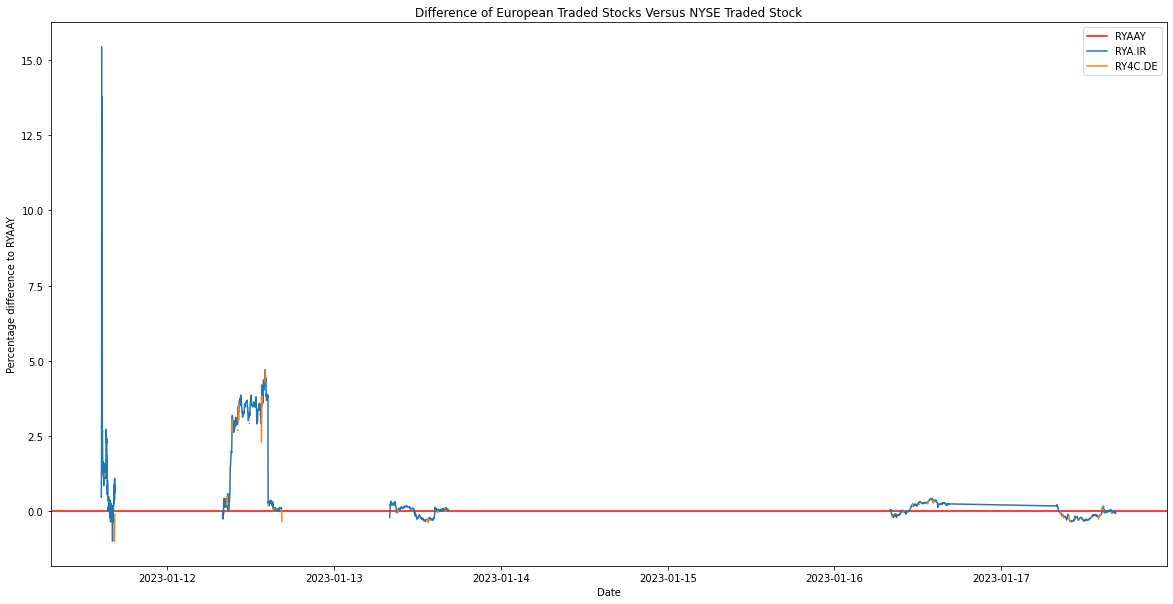

In [155]:
base_plot(test_tickers, diff_df)

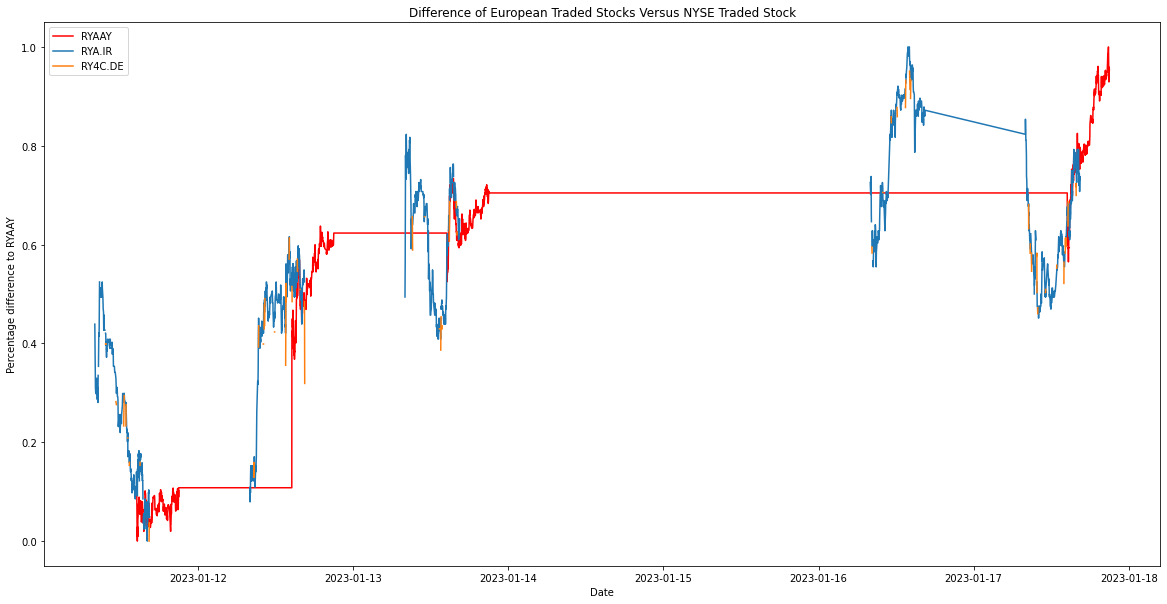

In [141]:
fig, ax = plt.subplots(1,1,figsize = (20,10))
ax.plot(base_df, label=base_df.name , color = "r")
ax.plot(df[test_tickers[-2:]],label=df[test_tickers[-2:]].columns)
ax.set_title("Difference of European Traded Stocks Versus NYSE Traded Stock")
ax.set_xlabel("Date")
ax.set_ylabel(f"Percentage difference to {test_tickers[0]}")
ax.legend()

In [148]:
overlap_df = df[~df.isnull().any(axis=1)]
trading_days = [group[1] for group in overlap_df.groupby(overlap_df.index.day)]

C:\Users\olive\AppData\Local\Temp\ipykernel_15308\3679318692.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diff_df[col] = diff_df[col]/base_df
C:\Users\olive\AppData\Local\Temp\ipykernel_15308\3679318692.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diff_df[col] = diff_df[col]/base_df
C:\Users\olive\AppData\Local\Temp\ipykernel_15308\3679318692.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

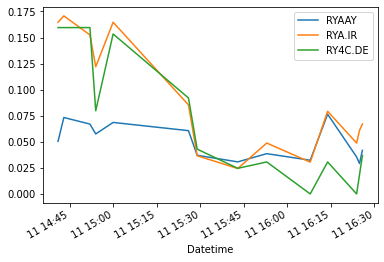

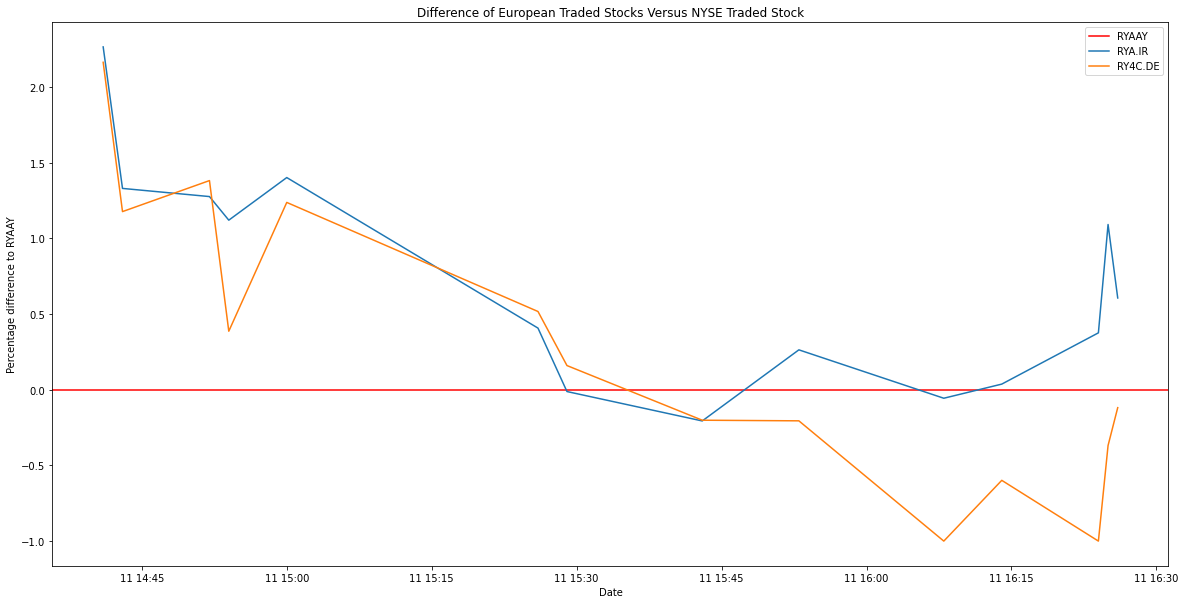

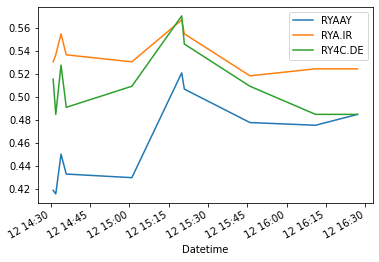

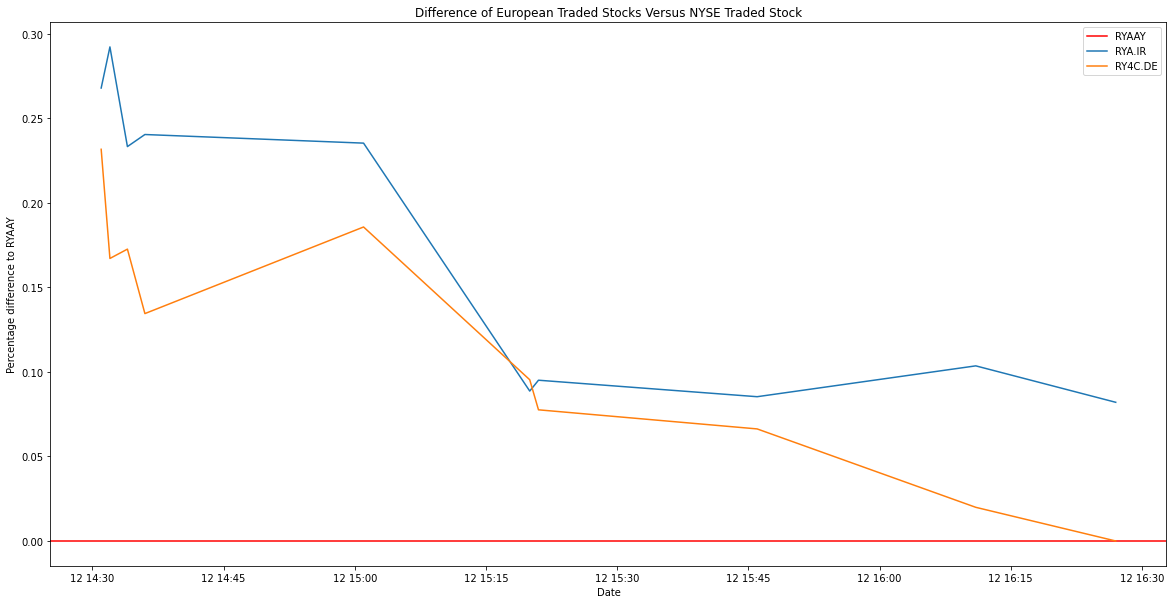

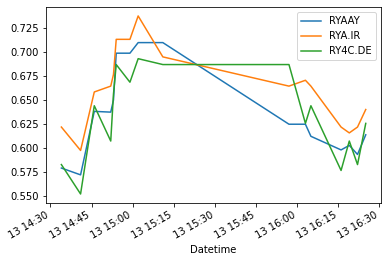

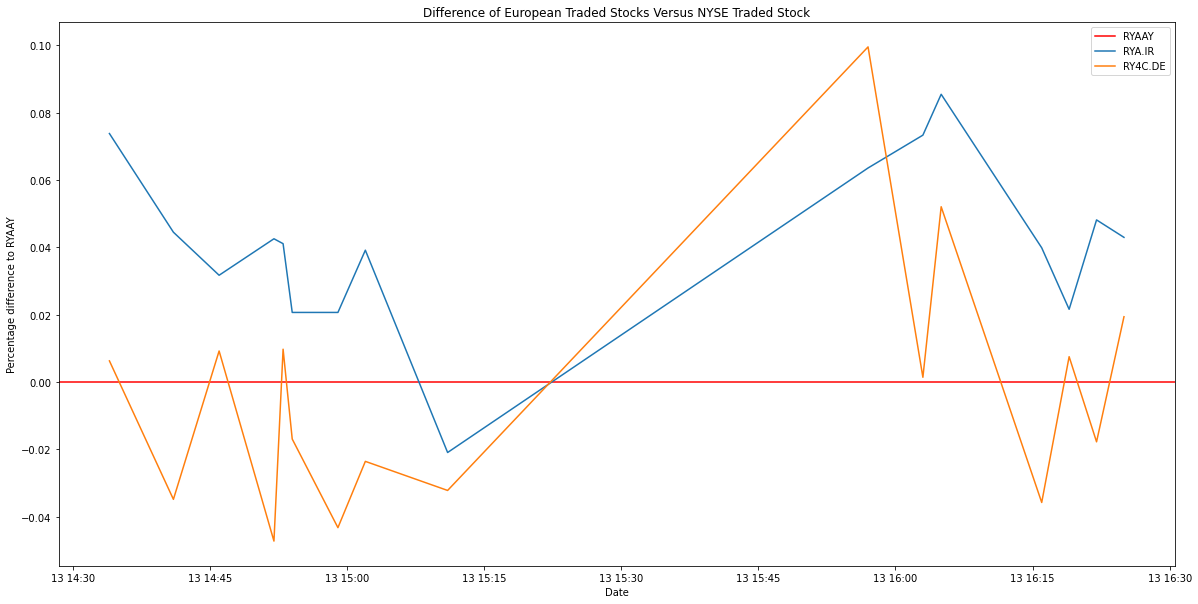

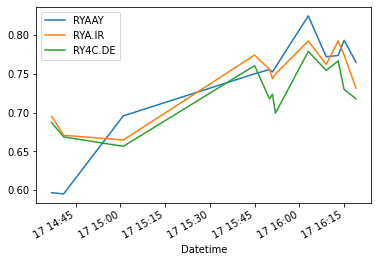

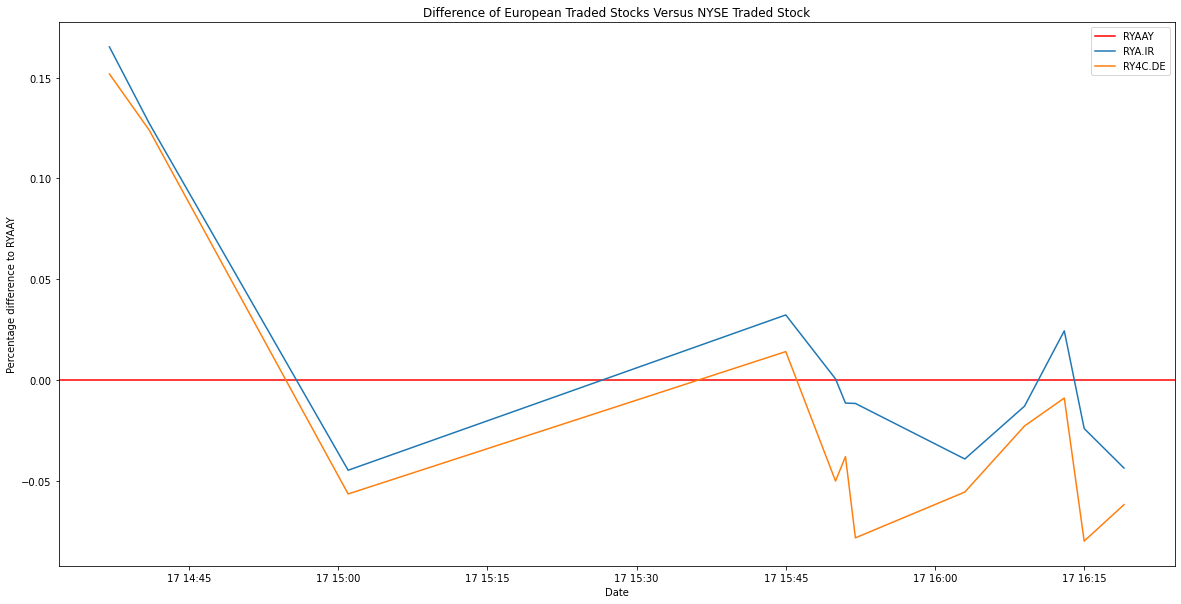

In [156]:
for trading_day in trading_days:
    trading_day.plot()
    base_df, diff_df = df_basing(trading_day)
    base_plot(test_tickers, diff_df)